# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import math

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Gradient descent in 1D

In [2]:
# function (as a function)
def fx(x):
  return 3 * x**2 - 3 * x + 4

# derivative function
def deriv(x):
  return 6 * x - 3

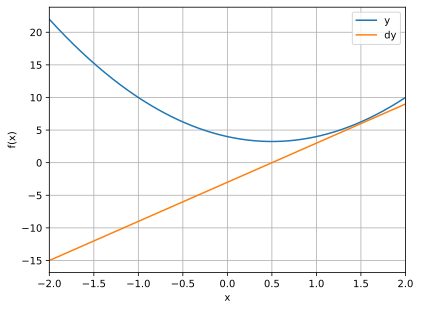

In [3]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

change learning rate according to:
- time
- derivative
- loss
- current local minimum value

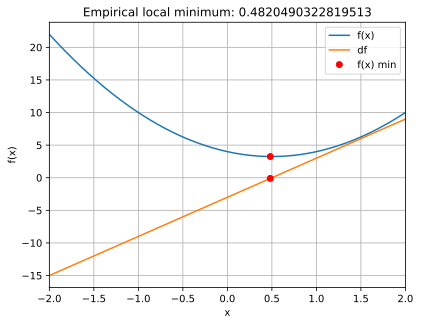

In [21]:
# Fixed learning rate

# initial value
localmin = np.random.choice(x, 1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training
modelparamsFixed = np.zeros((training_epochs, 3))
for i in range(training_epochs):
  # compute gradient
  grad = deriv(localmin)

  # non-adaptive learning rate
  lr = learning_rate

  # update parameter according to gradient
  localmin = localmin - lr * grad

  # store the parameters
  modelparamsFixed[i, :] = localmin[0], grad[0], lr

# plot the results
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin),'ro')
plt.plot(localmin, fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

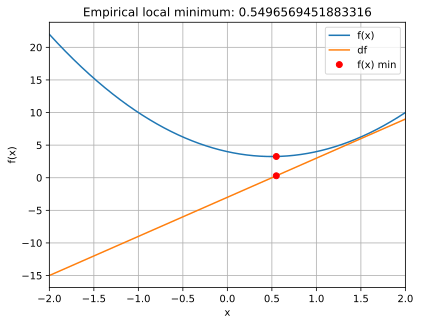

In [23]:
# Gradient-based learning rate

# initial value
localmin = np.random.choice(x, 1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training
modelparamsGrad = np.zeros((training_epochs, 3))
for i in range(training_epochs):
  # compute gradient
  grad = deriv(localmin)

  # non-adaptive learning rate
  lr = learning_rate * np.abs(grad)

  # update parameter according to gradient
  localmin = localmin - lr * grad

  # store the parameters
  modelparamsGrad[i, :] = localmin[0], grad[0], lr[0]

# plot the results
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin),'ro')
plt.plot(localmin, fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

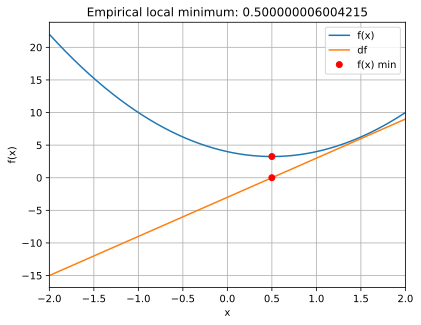

In [26]:
# Time-based learning rate

# learning parameters
learning_rate = .1
localmin = initval

# run through training
modelparamsTime = np.zeros((training_epochs, 3))
for i in range(training_epochs):
  # compute gradient
  grad = deriv(localmin)

  # non-adaptive learning rate
  lr = learning_rate * (1 - (i + 1) / training_epochs)

  # update parameter according to gradient
  localmin = localmin - lr * grad

  # store the parameters
  modelparamsGrad[i, :] = localmin[0], grad[0], lr

# plot the results
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin),'ro')
plt.plot(localmin, fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

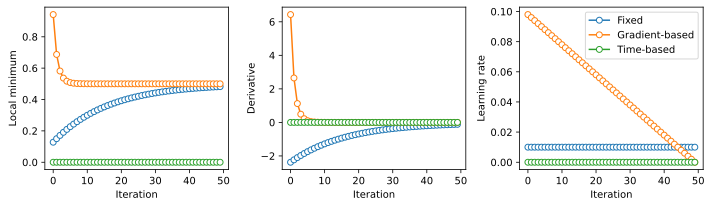

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# generate the plots
for i in range(3):
   ax[i].plot(modelparamsFixed[:, i], 'o-', markerfacecolor='w')
   ax[i].plot(modelparamsGrad[:, i], 'o-', markerfacecolor='w')
   ax[i].plot(modelparamsTime[:, i], 'o-', markerfacecolor='w')
   ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed', 'Gradient-based', 'Time-based'])

plt.tight_layout()
plt.show()